# Lead Scoring Case Study for Course 2 Machine Learning
### Submitted By: Gunjit Kapoor, Amrita Roy, Bidhan Chandra Roy
### Date of Submission: 24.01.2023

### Import Useful Libraries and Data Loading

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Styling the plot
style.use('ggplot')


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Adjusting Output Views
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Importing the dataset
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Quality Check

In [4]:
#check the shape of dataframe
leads_df.shape

(9240, 37)

In [5]:
#inspect the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#check the statistics of dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking Duplicate Values in 'Prospect ID'
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
# Duplicate Values in 'Lead Number'
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

### Inference: There are no duplicates in both 'Prospect ID' and 'Lead Number'

In [9]:
# Using this for Lead Score at the end of the notebook
Lead_Number = leads_df['Lead Number']

In [10]:
# Replacing the 'Select' with NA values
leads_df = leads_df.replace('Select', np.nan)

In [11]:
# Missing Values Percentages
round((leads_df.isnull().sum()/len(leads_df)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
#check the original Conversion Rate
original_Conversion_rate = round((sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100, 2)
print("The conversion rate of leads is ",original_Conversion_rate)

The conversion rate of leads is  38.54


In [13]:
# Removing the missing values with more than 40%
cols = leads_df.columns

for i in cols:
    if((100*leads_df[i].isnull().sum()/len(leads_df.index)) >= 40):
        leads_df.drop(i, axis = 1, inplace = True)

In [14]:
# Missing Value Percentages for the remaining variables
round((leads_df.isnull().sum()/len(leads_df)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Analyzing the Variables one-by-one

In [15]:
# City
leads_df['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
# Specialization
leads_df['Specialization'].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')


In [18]:
# Management Specialization
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')
# Business Specialization
leads_df['Specialization'] = leads_df['Specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')

In [19]:
leads_df['Specialization'].value_counts(dropna= False)

Management Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Business Specializations              308
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# 'Tags'
leads_df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [21]:
# Grouping values with low count in order to remove bias
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Not Specified')
leads_df['Tags'] = leads_df['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [22]:
leads_df['Tags'].value_counts(dropna = False)

Not Specified                          3353
Will revert after reading the email    2072
Other Tags                             1265
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Still Thinking                            6
Interested in Next batch                  5
Name: Tags, dtype: int64

In [23]:
# 'What matters most to you in choosing a course'
leads_df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# 'What is your current occupation'
leads_df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# Grouping values with low count in order to remove bias
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Specified')
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(['Housewife', 'Businessman'],
                                                                                           'Other')

In [26]:
# 'Country'
leads_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [27]:
# Lead Source
leads_df['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [28]:
# Replacing the NULL Values in 'Lead Source' with Google and grouping values with low count in order to remove bias
leads_df['Lead Source'] = leads_df['Lead Source'].replace([np.nan, 'google'], 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Referral Sites', 'Facebook', 'bing', 'google', 'Click2call',
                                                     'Live Chat', 'Social Media', 'Press_Release', 'testone',
                                                     'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                                                     'NC_EDM', 'youtubechannel'], 'Others')

In [29]:
# Last Activity
leads_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [30]:
# Replacing the NA values and other less occuring entries as Others
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan, 'Email Opened')
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Others')

In [31]:
# 'TotalVisits'
leads_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [32]:
# Replacing Null Values in 'TotalVisits' with median
leads_df['TotalVisits'] = leads_df['TotalVisits'].replace(np.nan, leads_df['TotalVisits'].median())

In [33]:
# 'Page Views Per Visit'
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [34]:
# Replacing the Null Values with 0.0, since, this is the most common entry
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].replace(np.nan, leads_df['Page Views Per Visit'].median())

In [35]:
leads_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [36]:
leads_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [37]:
leads_df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [38]:
leads_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [39]:
leads_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [40]:
leads_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [41]:
leads_df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [42]:
leads_df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [43]:
leads_df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [44]:
leads_df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [45]:
leads_df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [46]:
leads_df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [47]:
# Droppping these columns as we don't fit these in the model
cols_to_drop = ['Prospect ID','Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
                     'Receive More Updates About Our Courses', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                     'Through Recommendations', 'Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque']

In [48]:
# Dropping the City column as most entries are Mumbai or not known. So, it won't help much in our analysis
cols_to_drop.append('City')
# Dropping 'What matters most to you in choosing a course' due to the presence of high Null Values and majority of the them being Better Career Prospects
cols_to_drop.append('What matters most to you in choosing a course')
# Dropping Country column since, more than 90% values are India or NA only
cols_to_drop.append('Country')

In [49]:
cols_to_drop

['Prospect ID',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'City',
 'What matters most to you in choosing a course',
 'Country']

In [50]:
leads_df = leads_df.drop(cols_to_drop, axis = 1)

In [51]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

# Categorical Variables

In [52]:
def cat_var(cat):
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x = cat, hue = leads_df.Converted, data=leads_df)
    plt.xticks(rotation = 90)
    plt.show()

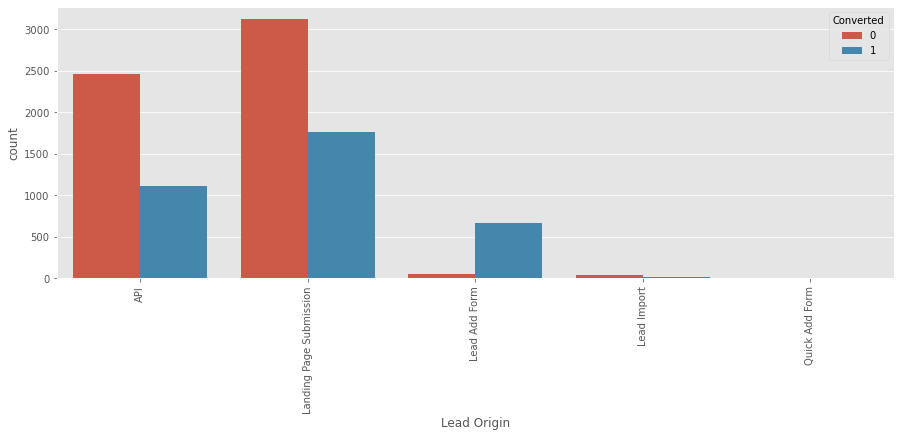

In [53]:
cat_var('Lead Origin')

In [54]:
#def function conversion summary
def conversion_summary(df,col):
    convert=df.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))

In [55]:
conversion_summary(leads_df,"Lead Origin")

Converted                     0       1  Conversion(%)
Lead Origin                                           
Quick Add Form              0.0     1.0          100.0
Lead Add Form              54.0   664.0           92.0
Landing Page Submission  3118.0  1768.0           36.0
API                      2465.0  1115.0           31.0
Lead Import                42.0    13.0           24.0


## OBSERVATIONS-
### From the above plot and Lead origin conversion summary, we can infer that:¶
- #### Lead Add Form has the highest conversion rate at 94%
- ####  API and Landing Page Submission have 31% and 36% conversion rate but they generate maximum leads counts.
- ####  Lead Import has the least amount of conversions and leads count.
- #### To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission. Also,generate more leads from Lead Add form since they have a very good conversion rate


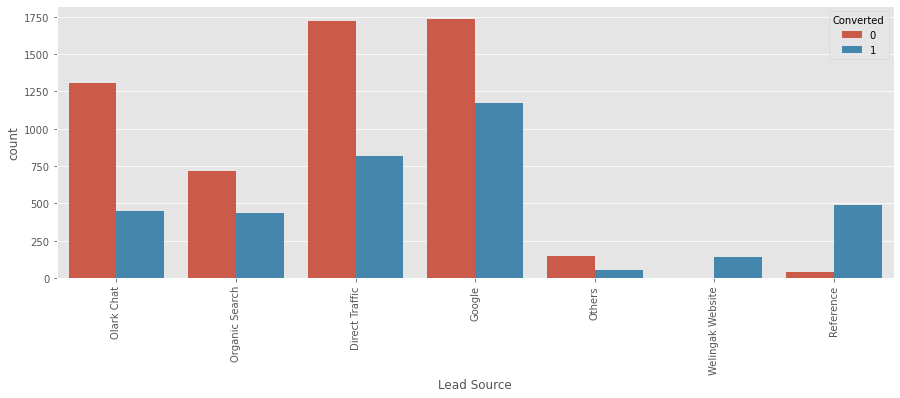

In [56]:
cat_var('Lead Source')

In [57]:
conversion_summary(leads_df,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   140           99.0
Reference           44   490           92.0
Google            1733  1176           40.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Olark Chat        1307   448           26.0
Others             150    53           26.0


### Observations

#### From the above plot and Lead Source conversion summary, we can infer that:

 - #### Google and direct traffic generates maximum number of leads but has conversion rate of 40% and 32%.
 - #### Welingak website and References has highest conversion rates around 98% and 93% but generates less number of leads.
 - #### olark chat and organic search generates significant number of leads but their conversion rate is around 26% and 38%.
 - #### Lead source in 'others' category generate very less leads.
 - #### To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source .Also , generate more leads from reference and welingak website since they have a very good conversion rate

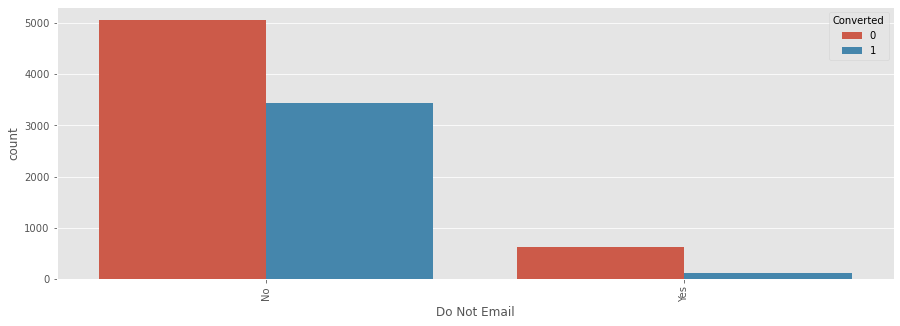

In [58]:
cat_var('Do Not Email')

In [59]:
conversion_summary(leads_df,"Do Not Email")

Converted        0     1  Conversion(%)
Do Not Email                           
No            5063  3443           40.0
Yes            616   118           16.0


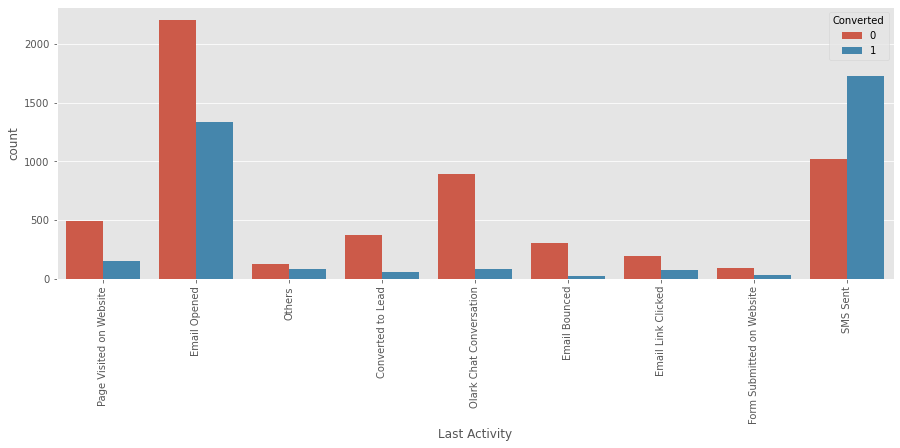

In [60]:
cat_var('Last Activity')

In [61]:
conversion_summary(leads_df,"Last Activity")

Converted                     0     1  Conversion(%)
Last Activity                                       
SMS Sent                   1018  1727           63.0
Others                      121    84           41.0
Email Opened               2206  1334           38.0
Email Link Clicked          194    73           27.0
Form Submitted on Website    88    28           24.0
Page Visited on Website     489   151           24.0
Converted to Lead           374    54           13.0
Olark Chat Conversation     889    84            9.0
Email Bounced               300    26            8.0


# Observations
- #### Maximum leads are generated from people with last activity - SMS sent,Email Opened and others('Visited Booth in Tradeshow', 'Resubscribed to emails','Email Marked Spam', 'Email Received', 'View in browser link Clicked', 'Approached upfront','Had a Phone Conversation', 'Unsubscribed', 'Unreachable')
- #### Conversion rate is around 63%, 38%,41%.
- #### Conversion rate in case of Email link clicked is 27 % while through 'Form submitted on website' and 'Page visited on website' is 24 %.
- #### Conversion rate in case of 'Olark Chat Conversation' and 'Email Bounced' is lowest 9% and 8%.

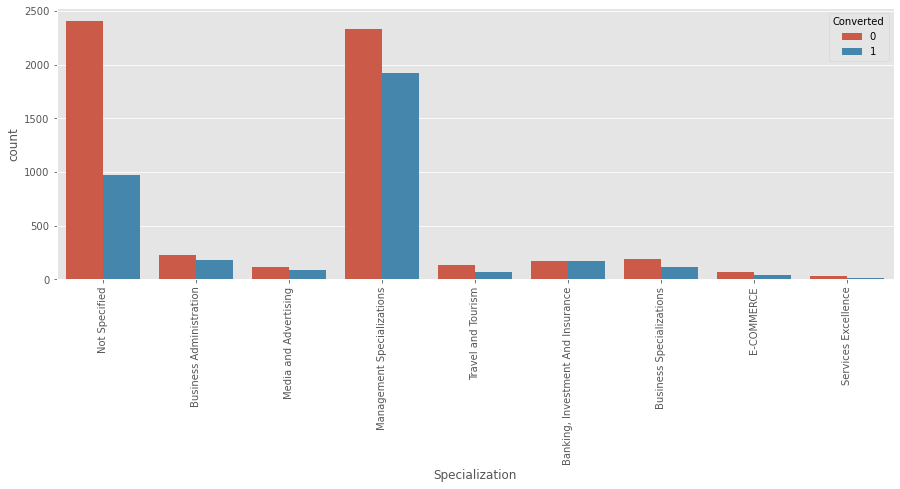

In [62]:
cat_var('Specialization')

In [63]:
conversion_summary(leads_df,'Specialization')

Converted                             0     1  Conversion(%)
Specialization                                              
Banking, Investment And Insurance   171   167           49.0
Management Specializations         2331  1922           45.0
Business Administration             224   179           44.0
Media and Advertising               118    85           42.0
Business Specializations            192   116           38.0
E-COMMERCE                           72    40           36.0
Travel and Tourism                  131    72           35.0
Not Specified                      2411   969           29.0
Services Excellence                  29    11           28.0


# OBSERVATION
- #### Highest number of lead conversion are from 'Banking,Investment And Insurance','Management Specializations'. 
- #### least conversions are from 'Services Excellence'.

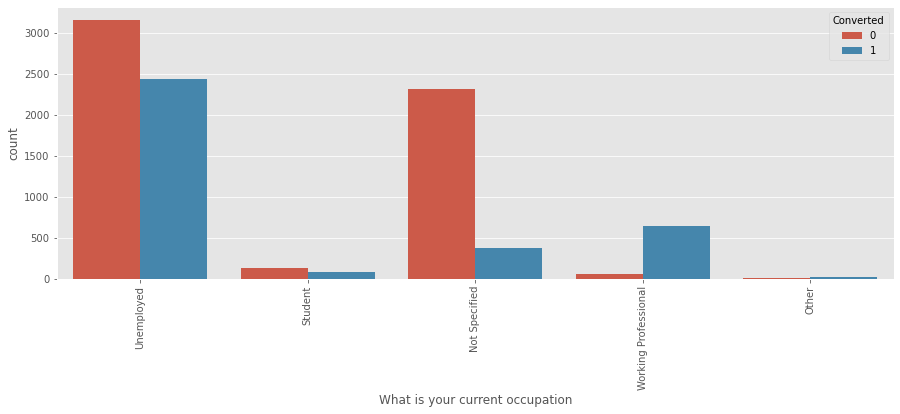

In [64]:
cat_var('What is your current occupation')

In [65]:
conversion_summary(leads_df,'What is your current occupation')

Converted                           0     1  Conversion(%)
What is your current occupation                           
Working Professional               59   647           92.0
Other                               9    25           74.0
Unemployed                       3159  2441           44.0
Student                           132    78           37.0
Not Specified                    2320   370           14.0


# OBSERVATION
- #### Lead conversion of 'Working Professional' is 92 % which is the highest.

In [66]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [67]:
# Grouping values with low count in order to remove bias
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Email Bounced', 'Email Link Clicked',
                                                                         'Unreachable', 'Had a Phone Conversation',
                                                                        'Olark Chat Conversation', 'Approached upfront',
                                                                        'Resubscribed to emails', 'Unsubscribed',
                                                                         'View in browser link Clicked',
                                                                        'Form Submitted on Website', 'Email Received',
                                                                         'Email Marked Spam'], 'Others')

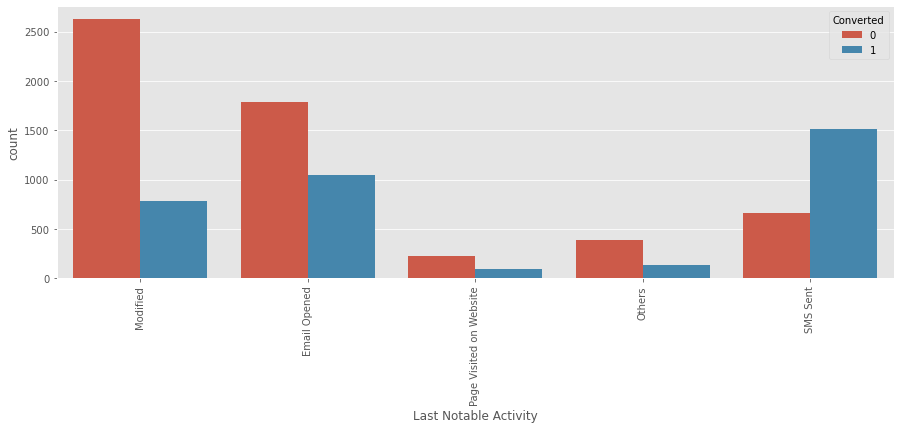

In [68]:
cat_var('Last Notable Activity')

In [69]:
conversion_summary(leads_df,'Last Notable Activity')

Converted                   0     1  Conversion(%)
Last Notable Activity                             
SMS Sent                  664  1508           69.0
Email Opened             1783  1044           37.0
Page Visited on Website   225    93           29.0
Others                    383   133           26.0
Modified                 2624   783           23.0


# OBSERVATION
- #### Highest conversion is for 'SMS Sent' which is 69%.
- #### The next is 'Email Opened' which has 37%.

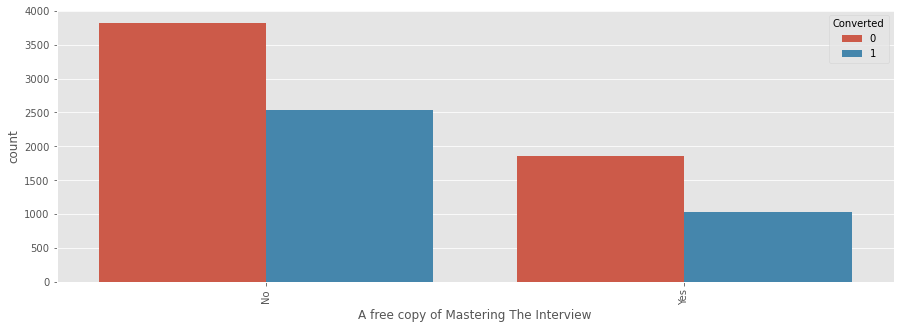

In [70]:
cat_var('A free copy of Mastering The Interview')

In [71]:
conversion_summary(leads_df,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3821  2531           40.0
Yes                                     1858  1030           36.0


# Observation

 - #### Most of the customers didnt want the free copy  of Mastering The Interview.
    
 - #### Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 39%
    

# Numerical Variables

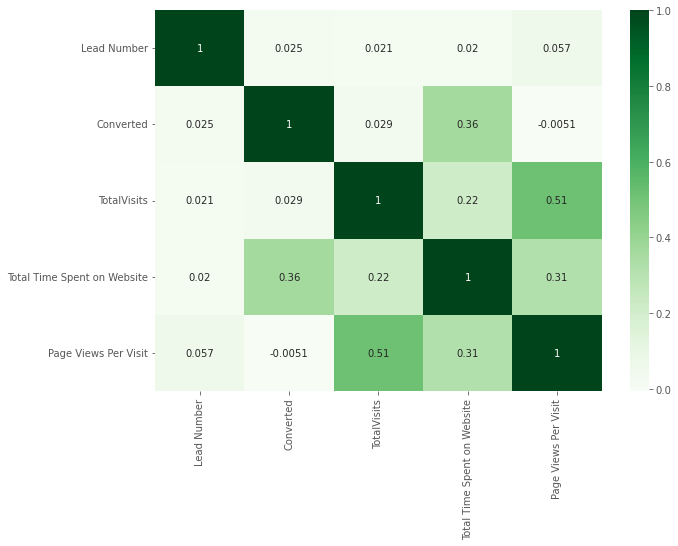

In [72]:
# Checking the Numberical columns for Correlation
plt.figure(figsize = (10,7))
sns.heatmap(leads_df.corr(), annot = True, cmap= 'Greens')
plt.show()

## Outlier Treatment

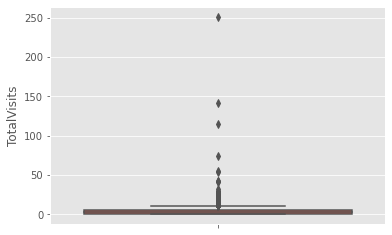

In [73]:
# 'TotalVisits'
sns.boxplot(y= leads_df['TotalVisits'])
plt.show()

In [74]:
leads_df['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

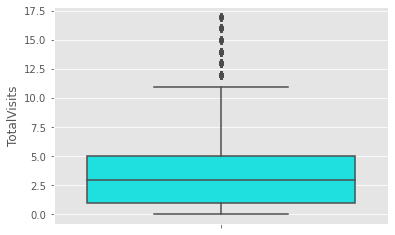

In [75]:
# Removing the top 1% of the value to handle outliers
leads_df = leads_df[(leads_df['TotalVisits'] <= leads_df['TotalVisits'].quantile(0.99))]
sns.boxplot(y=leads_df['TotalVisits'],color="cyan")
plt.show()

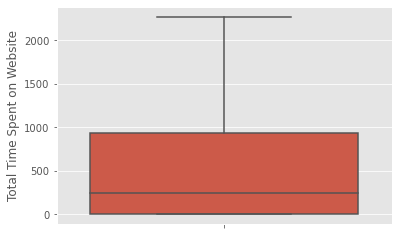

In [76]:
# 'Total Time Spent on Website'
sns.boxplot(y = leads_df['Total Time Spent on Website'])
plt.show()

In [77]:
# 'Page Views Per Visit'
leads_df['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

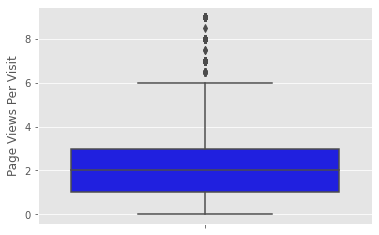

In [78]:
# Removing the top 1% of the values to handle the outliers
leads_df = leads_df[(leads_df['Page Views Per Visit'] <= leads_df['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y = leads_df['Page Views Per Visit'],color="blue")
plt.show()

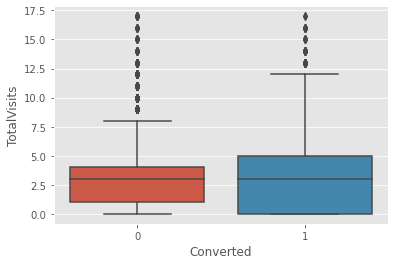

In [79]:
# Checking 'TotalVisits' vs 'Converted'
sns.boxplot(x = leads_df['Converted'], y = leads_df['TotalVisits'])
plt.show()

In [80]:
# Converting Yes/No into 1/0 to fit the model
def mapp(x):
    return x.map({'Yes': 1, 'No':0})

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Applying the above custom function

leads_df[varlist] = leads_df[varlist].apply(mapp)

In [81]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


In [82]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9090 non-null   int64  
 1   Lead Origin                             9090 non-null   object 
 2   Lead Source                             9090 non-null   object 
 3   Do Not Email                            9090 non-null   int64  
 4   Converted                               9090 non-null   int64  
 5   TotalVisits                             9090 non-null   float64
 6   Total Time Spent on Website             9090 non-null   int64  
 7   Page Views Per Visit                    9090 non-null   float64
 8   Last Activity                           9090 non-null   object 
 9   Specialization                          9090 non-null   object 
 10  What is your current occupation         9090 non-null   obje

In [83]:
cat_cols = leads_df.select_dtypes(include = 'object').columns

### Creating dummy variables for the categorical columns

In [84]:
dummy = pd.get_dummies(leads_df[cat_cols],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [85]:
# Combining dummy data with the original dataset

leads_df = pd.concat([leads_df, dummy], axis=1)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [86]:
# Drop the original columns 

leads_df = leads_df.drop(cat_cols, axis=1)
leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [87]:
leads_df = leads_df.drop(['Lead Number'], axis=1)
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [88]:
leads_df.shape

(9090, 48)

# Train-Test Split

In [89]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)


# Putting response variable to y
y = leads_df['Converted']

In [90]:
#importing sklearn and statsmodels libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [92]:
# Scaling the Numerical variables
scaler = StandardScaler()

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3241,0,0.294642,0.897591,-0.492776,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


# Feature Selection Using RFE

In [93]:
# Logistic Regression
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', False, 2),
 ('Specializati

In [95]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch', 'Tags_Interested in other courses', 'Tags_Not Specified', 'Tags_Other Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Business Administration', 'Specialization_Business Specializations', 'Specialization_E-COMMERCE', 'Specialization_Management Specializations', 'Specialization_Media and Advertising', 'Specialization_Not Specified', 'Specialization_Services Excellence', 'Tags_Still Thinking', 'Last Notable Activity_Modified', 'Last Notable Activity_Others', 'Last Notable Activity_Page Visited on Website'], dtype='object')

# Model Building

In [97]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.7
Date:                Tue, 24 Jan 2023   Deviance:                       2873.5
Time:                        19:05:42   Pearson chi2:                 7.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5844
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4673      0.546    -11.841      0.000      -7.538      -5.397
Do Not Email                                            -1.2101      0.246     -4.909      0.000      -1.693      -0.727
Total Time Spent on Website                              1.0872      0.055     19.662      0.000       0.979       1.196
Lead Origin_Lead Add Form                                1.9348      0.327      5.916      0.000       1.294       2.576
Lead Source_Olark Chat                                   1.2167      0.143      8.504      0.000       0.936       1.497
Lead Source_Welingak Website                             3.7680      1.077      3.499      0.000       1.657       5.879
Last Activity_Email Bounced                             -1.3107      0.498     -2.633      0.008      -2.286      -0.335
Last Activity_Olark Chat Conversation                   -1.1859      0.205     -5.787      0.000      -1.588      -0.784
Specialization_Travel and Tourism                       -0.9551      0.395     -2.418      0.016      -1.729      -0.181
What is your current occupation_Other                    1.8529      0.791      2.343      0.019       0.303       3.403
What is your current occupation_Student                  1.8413      0.460      4.006      0.000       0.940       2.742
What is your current occupation_Unemployed               1.7554      0.140     12.509      0.000       1.480       2.030
What is your current occupation_Working Professional     2.4845      0.321      7.733      0.000       1.855       3.114
Tags_Closed by Horizzon                                  8.7270      0.901      9.689      0.000       6.962      10.492
Tags_Interested in Next batch                           23.9232   1.52e+04      0.002      0.999   -2.97e+04    2.98e+04
Tags_Interested in other courses                         0.4007      0.658      0.609      0.542      -0.889       1.690
Tags_Not Specified                                       4.1670      0.538      7.750      0.000       3.113       5.221
Tags_Other Tags                                          2.9425      0.534      5.515      0.000       1.897       3.988
Tags_Ringing                                            -0.1353      0.571     -0.237      0.813      -1.254       0.984
Tags_Will revert after reading the email                 6.9127      0.548     12.619      0.000       5.839       7.986
Last Notable Activity_SMS Sent                           1.8458      0.118     15.689      0.000       1.615       2.076
========================================================================================================================
"""

In [98]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,5.61
18,Tags_Will revert after reading the email,3.50
17,Tags_Ringing,2.20
16,Tags_Other Tags,2.15
11,What is your current occupation_Working Profes...,1.98
2,Lead Origin_Lead Add Form,1.85
3,Lead Source_Olark Chat,1.84
0,Do Not Email,1.78
5,Last Activity_Email Bounced,1.70
19,Last Notable Activity_SMS Sent,1.59


In [99]:
#### The p- value for the variable 'Tags_Interested in Next batch' is high. So the column needs to be dropped.
col2 = col1.drop('Tags_Interested in Next batch',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Not Specified', 'Tags_Other Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [100]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.1
Date:                Tue, 24 Jan 2023   Deviance:                       2884.1
Time:                        19:05:42   Pearson chi2:                 7.40e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5837
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0029      0.442    -13.571      0.000      -6.870      -5.136
Do Not Email                                            -1.1645      0.244     -4.764      0.000      -1.644      -0.685
Total Time Spent on Website                              1.0888      0.055     19.757      0.000       0.981       1.197
Lead Origin_Lead Add Form                                1.9362      0.327      5.917      0.000       1.295       2.578
Lead Source_Olark Chat                                   1.2125      0.143      8.483      0.000       0.932       1.493
Lead Source_Welingak Website                             3.7635      1.077      3.495      0.000       1.653       5.874
Last Activity_Email Bounced                             -1.3433      0.496     -2.706      0.007      -2.316      -0.370
Last Activity_Olark Chat Conversation                   -1.1821      0.205     -5.771      0.000      -1.584      -0.781
Specialization_Travel and Tourism                       -0.9614      0.394     -2.437      0.015      -1.734      -0.188
What is your current occupation_Other                    1.8521      0.790      2.343      0.019       0.303       3.401
What is your current occupation_Student                  1.7653      0.450      3.927      0.000       0.884       2.646
What is your current occupation_Unemployed               1.7568      0.141     12.503      0.000       1.481       2.032
What is your current occupation_Working Professional     2.4816      0.321      7.727      0.000       1.852       3.111
Tags_Closed by Horizzon                                  8.2620      0.842      9.818      0.000       6.613       9.911
Tags_Interested in other courses                        -0.0668      0.574     -0.116      0.907      -1.193       1.059
Tags_Not Specified                                       3.6963      0.431      8.569      0.000       2.851       4.542
Tags_Other Tags                                          2.4678      0.426      5.795      0.000       1.633       3.302
Tags_Ringing                                            -0.6191      0.471     -1.315      0.188      -1.542       0.304
Tags_Will revert after reading the email                 6.4455      0.444     14.519      0.000       5.575       7.316
Last Notable Activity_SMS Sent                           1.8686      0.117     15.904      0.000       1.638       2.099
========================================================================================================================
"""

In [101]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,5.59
17,Tags_Will revert after reading the email,3.49
16,Tags_Ringing,2.20
15,Tags_Other Tags,2.15
11,What is your current occupation_Working Profes...,1.98
2,Lead Origin_Lead Add Form,1.85
3,Lead Source_Olark Chat,1.83
0,Do Not Email,1.77
5,Last Activity_Email Bounced,1.70
18,Last Notable Activity_SMS Sent,1.58


In [102]:
## The p value for variable 'Tags_Interested in other courses' is high and it needs to be dropped.
col3 = col2.drop('Tags_Interested in other courses',1)
col3

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Not Specified', 'Tags_Other Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [103]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.1
Date:                Tue, 24 Jan 2023   Deviance:                       2884.1
Time:                        19:05:43   Pearson chi2:                 7.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5837
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0379      0.328    -18.436      0.000      -6.680      -5.396
Do Not Email                                            -1.1642      0.244     -4.763      0.000      -1.643      -0.685
Total Time Spent on Website                              1.0888      0.055     19.758      0.000       0.981       1.197
Lead Origin_Lead Add Form                                1.9353      0.327      5.918      0.000       1.294       2.576
Lead Source_Olark Chat                                   1.2128      0.143      8.486      0.000       0.933       1.493
Lead Source_Welingak Website                             3.7644      1.077      3.496      0.000       1.654       5.875
Last Activity_Email Bounced                             -1.3437      0.496     -2.706      0.007      -2.317      -0.371
Last Activity_Olark Chat Conversation                   -1.1826      0.205     -5.775      0.000      -1.584      -0.781
Specialization_Travel and Tourism                       -0.9615      0.394     -2.437      0.015      -1.735      -0.188
What is your current occupation_Other                    1.8517      0.790      2.343      0.019       0.303       3.401
What is your current occupation_Student                  1.7713      0.447      3.960      0.000       0.895       2.648
What is your current occupation_Unemployed               1.7568      0.141     12.503      0.000       1.481       2.032
What is your current occupation_Working Professional     2.4804      0.321      7.730      0.000       1.852       3.109
Tags_Closed by Horizzon                                  8.2974      0.786     10.559      0.000       6.757       9.838
Tags_Not Specified                                       3.7312      0.313     11.920      0.000       3.118       4.345
Tags_Other Tags                                          2.5028      0.305      8.206      0.000       1.905       3.101
Tags_Ringing                                            -0.5841      0.365     -1.602      0.109      -1.299       0.131
Tags_Will revert after reading the email                 6.4806      0.329     19.703      0.000       5.836       7.125
Last Notable Activity_SMS Sent                           1.8686      0.117     15.904      0.000       1.638       2.099
========================================================================================================================
"""

In [104]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.08
16,Tags_Will revert after reading the email,2.97
15,Tags_Ringing,1.88
2,Lead Origin_Lead Add Form,1.85
3,Lead Source_Olark Chat,1.83
14,Tags_Other Tags,1.83
11,What is your current occupation_Working Profes...,1.78
0,Do Not Email,1.77
5,Last Activity_Email Bounced,1.70
17,Last Notable Activity_SMS Sent,1.58


In [105]:
## The p value of 'Tags_Ringing' is high above the threshold of 0.05, so it needs to be dropped.
col4 = col3.drop('Tags_Ringing',1)
col4

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Not Specified', 'Tags_Other Tags', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [106]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.3
Date:                Tue, 24 Jan 2023   Deviance:                       2886.6
Time:                        19:05:43   Pearson chi2:                 7.19e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5836
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4275      0.240    -26.825      0.000      -6.897      -5.958
Do Not Email                                            -1.1557      0.244     -4.737      0.000      -1.634      -0.678
Total Time Spent on Website                              1.0901      0.055     19.779      0.000       0.982       1.198
Lead Origin_Lead Add Form                                1.9197      0.325      5.910      0.000       1.283       2.556
Lead Source_Olark Chat                                   1.2173      0.143      8.523      0.000       0.937       1.497
Lead Source_Welingak Website                             3.7802      1.076      3.512      0.000       1.671       5.890
Last Activity_Email Bounced                             -1.3586      0.496     -2.738      0.006      -2.331      -0.386
Last Activity_Olark Chat Conversation                   -1.1786      0.205     -5.744      0.000      -1.581      -0.776
Specialization_Travel and Tourism                       -0.9538      0.395     -2.417      0.016      -1.727      -0.180
What is your current occupation_Other                    1.8502      0.791      2.339      0.019       0.300       3.401
What is your current occupation_Student                  1.8438      0.454      4.061      0.000       0.954       2.734
What is your current occupation_Unemployed               1.7550      0.140     12.512      0.000       1.480       2.030
What is your current occupation_Working Professional     2.4980      0.323      7.745      0.000       1.866       3.130
Tags_Closed by Horizzon                                  8.6878      0.753     11.535      0.000       7.212      10.164
Tags_Not Specified                                       4.1263      0.215     19.217      0.000       3.705       4.547
Tags_Other Tags                                          2.9004      0.201     14.461      0.000       2.507       3.294
Tags_Will revert after reading the email                 6.8714      0.241     28.562      0.000       6.400       7.343
Last Notable Activity_SMS Sent                           1.8382      0.115     15.929      0.000       1.612       2.064
========================================================================================================================
"""

In [107]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.40
15,Tags_Will revert after reading the email,2.33
2,Lead Origin_Lead Add Form,1.85
3,Lead Source_Olark Chat,1.83
0,Do Not Email,1.77
5,Last Activity_Email Bounced,1.70
11,What is your current occupation_Working Profes...,1.61
16,Last Notable Activity_SMS Sent,1.55
13,Tags_Not Specified,1.47
14,Tags_Other Tags,1.46


### Now for the above model 4, the VIF values and p value are under threshold of 3.0 and 0.05. So this will be our final model for futher analysis.

In [108]:
# Predictions on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.0590476 , 0.01029763, 0.36040649, ..., 0.37933534, 0.72155234,
       0.00375915])

In [109]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.059048,302
1,0,0.010298,6087
2,0,0.360406,1033
3,0,0.014018,7656
4,1,0.993410,3241


In [110]:
# Making a new column Predicted with values which have Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.059048,302,0
1,0,0.010298,6087,0
2,0,0.360406,1033,0
3,0,0.014018,7656,0
4,1,0.993410,3241,1


# Model Evaluation

In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.9107339305359108


In [112]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3759,  176],
       [ 392, 2036]], dtype=int64)

In [113]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3759            176
    # Converted            392             2036  

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8385502471169687

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.9552731893265566

In [117]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.04472681067344346


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.9204339963833634


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9055649241146712


# Plotting the ROC Curve


 - #### ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
 - #### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

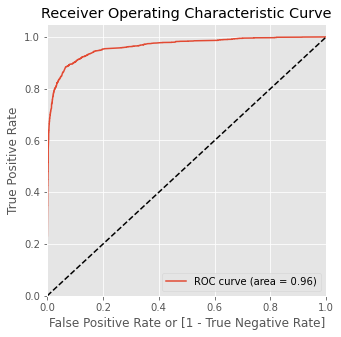

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The ROC Curve should be a value close to 1. We are getting a value of 0.96 indicating a good predictive model.

# Finding Optimal Cut-off Points.
### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.059048,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.010298,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.360406,1033,0,1,1,1,1,0,0,0,0,0,0
3,0,0.014018,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.993410,3241,1,1,1,1,1,1,1,1,1,1,1


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.381581     1.000000    0.000000
0.1          0.1  0.812981     0.960049    0.722236
0.2          0.2  0.883860     0.931219    0.854638
0.3          0.3  0.899576     0.909390    0.893520
0.4          0.4  0.912463     0.886326    0.928590
0.5          0.5  0.910734     0.838550    0.955273
0.6          0.6  0.909162     0.817133    0.965947
0.7          0.7  0.905233     0.790774    0.975858
0.8          0.8  0.894547     0.752883    0.981957
0.9          0.9  0.871130     0.675865    0.991614


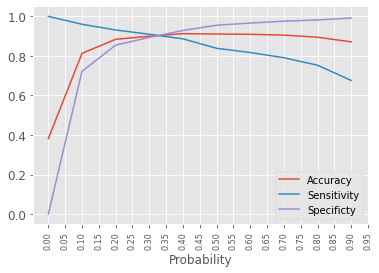

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.xticks(rotation=90)
plt.yticks(size=12)
plt.show()

### Observation

#### From the above curve we can see that the optimal cutoff is at 0.325. This is the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced.

In [126]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.059048,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.010298,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.360406,1033,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.014018,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.993410,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.8995756718528995


In [128]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion2

array([[3516,  419],
       [ 220, 2208]], dtype=int64)

In [129]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3516            419
    # Converted            220             2208  

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's check the sensitivity 
TP / float(TP+FN)

0.8385502471169687

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.9552731893265566

In [133]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.04472681067344346


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.9204339963833634


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9055649241146712


# Metrics - Precision and Recall

In [136]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8405024743052912

In [137]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9093904448105437

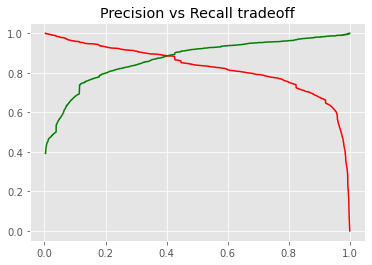

In [138]:
#Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Converted_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

#### As seen from above,there is tradeoff between Precision and Recall.Precision and Recall are inversely related means if one increases other will genuinely decrease.

# Making Predictions on the Test Set

In [139]:
# Scaling the Numerical Variables
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [140]:
X_test = X_test[col4]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Not Specified,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
6906,0,1.919395,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1873,0,-0.546142,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
771,0,-0.797465,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4495,0,-0.623190,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9061,0,2.392690,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [141]:
X_test.shape

(2727, 17)

In [142]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [143]:
#making predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

6906    0.997827
1873    0.005128
771     0.003904
4495    0.004717
9061    0.285183
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6906,0.997827
1873,0.005128
771,0.003904
4495,0.004717
9061,0.285183


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [147]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [148]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.997827
1,0,1873,0.005128
2,0,771,0.003904
3,0,4495,0.004717
4,1,9061,0.285183


In [149]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [150]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.997827
1,1873,0,0.005128
2,771,0,0.003904
3,4495,0,0.004717
4,9061,1,0.285183


In [151]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.325 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,6906,1,0.997827,1
1,1873,0,0.005128,0
2,771,0,0.003904,0
3,4495,0,0.004717,0
4,9061,1,0.285183,0


In [152]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.9123579024569124

In [153]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1518,  142],
       [  97,  970]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9090909090909091

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9144578313253012

In [157]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.0855421686746988


In [158]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8723021582733813


In [159]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Converted_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [160]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score,Lead_Type
0,6906,1,0.997827,1,100,Hot Lead
2432,5947,1,0.996576,1,100,Hot Lead
484,177,1,0.999987,1,100,Hot Lead
471,3286,1,0.999841,1,100,Hot Lead
1939,1748,1,0.998124,1,100,Hot Lead
...,...,...,...,...,...,...
2477,8357,0,0.000501,0,0,Cold Lead
170,6734,0,0.003711,0,0,Cold Lead
1209,761,0,0.004351,0,0,Cold Lead
1874,8279,0,0.001092,0,0,Cold Lead


In [161]:
# Precision Score
precision_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.8723021582733813

In [162]:
recall_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.9090909090909091

### Final Observation:
#### Lets compare the  Model Performance parameters obtained for Train & Test data:

 - #### Train Data: 
#### Accuracy : 89.9%
#### Sensitivity : 83.8%
#### Specificity : 95.5%
#### Precision : 84.0%
#### Recall : 90.9%



 - #### Test Data: 
#### Accuracy : 91.2%
#### Sensitivity : 90.9%
#### Specificity : 91.4%
#### Precision : 87.0%
#### Recall : 90.9%

### Observation 


 - #### We got upto 5% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.

 - #### High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.

 - #### Depending on the business requirement, we can increase or decrease the probability threshold value which in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

### Final Model Reporting & Equation-

#### log odds is given by: log(P/1-P) = c + B1X1 +B2X2 + B3X3 + .... + BnXn
### log odds=-6.4275+(-1.1557 * Do Not Email)+(1.0901 * Total Time Spent on Website)+(1.9197 * Lead Origin_Lead Add Form)+(1.2173 * Lead Source_Olark Chat)+(3.7802 * Lead Source_Welingak Website)+(-1.3586 * Last Activity_Email Bounced)+(-1.1786 * Last Activity_Olark Chat Conversation)+(-0.9538 * Specialization_Travel and Tourism)+(1.8502 * What is your current occupation_Other)+(1.8438 * What is your current occupation_Student)+(1.7550 * What is your current occupation_Unemployed)+(2.4980 * What is your current occupation_Working Professional)+(8.6878 * Tags_Closed by Horizzon)+(4.1263 * Tags_Not Specified)+(2.9004 * Tags_Other Tags)+(6.8714 * Tags_Will revert after reading the email)+(1.8382 * Last Notable Activity_SMS Sent)


In [163]:
# END